In [22]:
import urllib2
import requests
import json
import pickle
import pprint as pp
# from BeautifulSoup import BeautifulSoup
import re

import pandas as pd
from IPython.display import display

import matplotlib.pyplot as plt
import matplotlib
% matplotlib inline

In [30]:
r = pickle.load(open('questionWithAccepted.txt'))
# pp.pprint(r)
df = pd.DataFrame.from_dict(r)
display(df.head())

,acceptedAnswerId,averageLengthOfCodeSnippet,englishNumChars,englishNumWords,linesInEachPreCodeSnippet,numQuestionMarks,numberImages,numberLinks,numberOfCodeSnippets,totalLinesOfCode
0,43853581.0,2.000000,273,51,[2],2,0,1,1,2
1,43902649.0,11.400000,391,66,"[16, 9, 5, 12, 15]",0,0,0,5,57
2,NaN,0.000000,308,55,[],1,0,0,0,0
3,43881370.0,0.000000,725,128,[],2,0,4,0,0
4,43823830.0,1.833333,1093,178,"[2, 1, 2, 1, 4, 1]",1,0,0,6,11


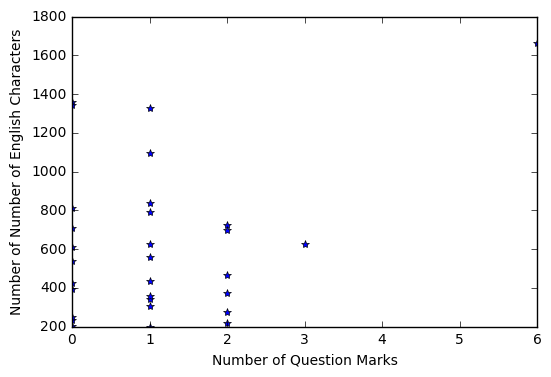

In [31]:
plt.plot(df['numQuestionMarks'], df['englishNumChars'], '*')
plt.xlabel('Number of Question Marks')
plt.ylabel('Number of Number of English Characters')
plt.show()